In [1]:
%matplotlib inline

In [2]:
import pandas as pd
from psyrun import NpzStore
import seaborn as sns

In [3]:
sns.set('paper', 'ticks')

In [4]:
neuron_type_order = ['LIF', 'Direct']
backend_order = ['reference', 'optimized', 'ocl_cpu', 'ocl_gpu']

## Circular convolution network

In [5]:
df = pd.DataFrame(NpzStore().load('../data/time_cconv.npz')).query('neuron_type != "LIFRate"')

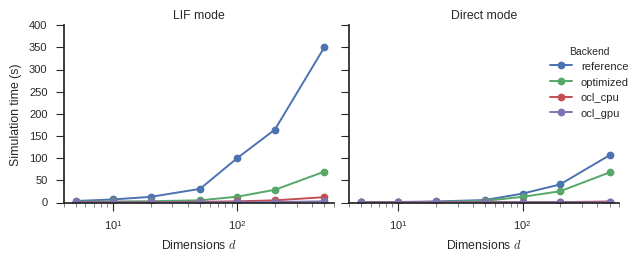

In [6]:
g = sns.FacetGrid(
    df.query('model == "circ_conv" and n_neurons == 500'),
    col='neuron_type', col_order=neuron_type_order,
    hue='backend', hue_order=backend_order,
    size=7. / 2.54)
def lineplot(x, y, unit, condition, data, **kwargs):
    del kwargs['label']
    data = data.reset_index()
    return sns.tsplot(
        time=x, value=y, unit=unit, condition=condition, data=data,
        marker='o', err_style='ci_bars',
        **kwargs)
    
g.map_dataframe(lineplot, 'dimensions', 't_sim', unit='trial', condition='backend')
g.map(plt.semilogx)
g.set(xlim=(4, 600))
g.set_titles("{col_name} mode")
g.set_axis_labels("Dimensions $d$", "Simulation time (s)")
g.add_legend(title="Backend", bbox_to_anchor=(1, 0.65))
plt.tight_layout()
plt.savefig('../figures/cconv_sim.pdf')

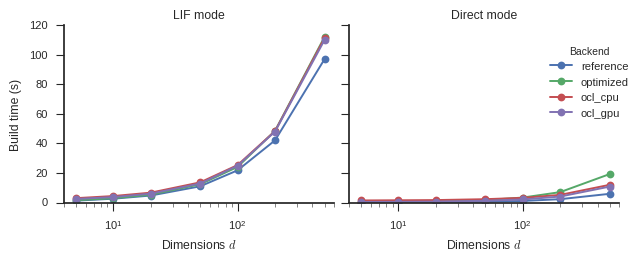

In [7]:
g = sns.FacetGrid(
    df.query('model == "circ_conv" and n_neurons == 500'),
    col='neuron_type', col_order=neuron_type_order,
    hue='backend', hue_order=backend_order,
    size=7. / 2.54)
def lineplot(x, y, unit, condition, data, **kwargs):
    del kwargs['label']
    data = data.reset_index()
    return sns.tsplot(
        time=x, value=y, unit=unit, condition=condition, data=data,
        marker='o', err_style='ci_bars',
        **kwargs)
    
g.map_dataframe(lineplot, 'dimensions', 't_build', unit='trial', condition='backend')
g.map(plt.semilogx)
g.set(xlim=(4, 600))
g.set_titles("{col_name} mode")
g.set_axis_labels("Dimensions $d$", "Build time (s)")
g.add_legend(title="Backend", bbox_to_anchor=(1, 0.65))
plt.tight_layout()
plt.savefig('../figures/cconv_build.pdf')

In [8]:
df.query('model == "circ_conv" and n_neurons == 500 and dimensions == 500').groupby(['neuron_type', 'backend']).mean()

dimensions  n_neurons     t_build  t_prefill  \
neuron_type backend                                                   
Direct      ocl_cpu         500.0        500   12.047069   0.063904   
            ocl_gpu         500.0        500   10.855240   0.015721   
            optimized       500.0        500   19.311460   0.638542   
            reference       500.0        500    5.964318   0.970827   
LIF         ocl_cpu         500.0        500  111.295905   0.160292   
            ocl_gpu         500.0        500  110.013055   0.045690   
            optimized       500.0        500  112.045687   0.688371   
            reference       500.0        500   97.025595   3.470738   

                            t_sim  trial  
neuron_type backend                       
Direct      ocl_cpu      2.543884      2  
            ocl_gpu      0.780961      2  
            optimized   68.126992      2  
            reference  106.878624      2  
LIF         ocl_cpu     12.308367      2  
            ocl_gpu      2.987652      2  
            optimized   69.925474      2  
            reference  350.399032      2

## n-back task model

In [9]:
df = pd.DataFrame(NpzStore().load('../data/time_nback.npz')).query('neuron_type != "LIFRate"')
df['splits'] = 64 // df['sd']
df.columns

Index(['backend', 'model', 'neuron_type', 'sd', 't_build', 't_prefill',
       't_sim', 'trial', 'splits'],
      dtype='object')

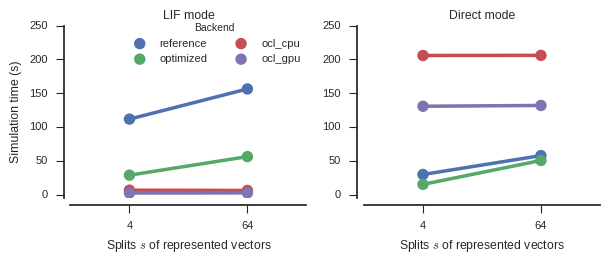

In [10]:
g = sns.FacetGrid(
    df.query('model == "nback"'),
    col='neuron_type', col_order=neuron_type_order,
    size=7. / 2.54, aspect=0.8)
    
g.map_dataframe(
    sns.pointplot, 'splits', 't_sim',
    hue='backend', hue_order=backend_order,
    palette='deep')
g.set(ylim=(-5, 250))
g.set_titles("{col_name} mode")
g.set_axis_labels("Splits $s$ of represented vectors", "Simulation time (s)")
g.add_legend(title="Backend", bbox_to_anchor=(.5, 0.8), ncol=2, label_order=backend_order)
g.despine(offset=5)
plt.tight_layout()
plt.savefig('../figures/nback_sim.pdf')

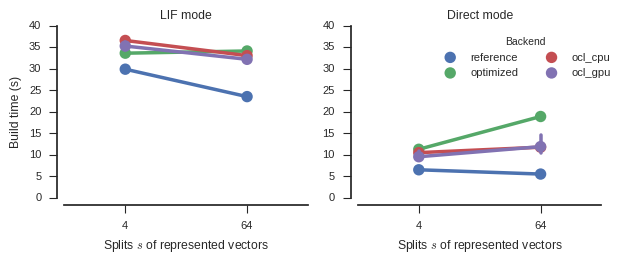

In [11]:
g = sns.FacetGrid(
    df.query('model == "nback"'),
    col='neuron_type', col_order=neuron_type_order,
    size=7. / 2.54, aspect=.8)
    
g.map_dataframe(
    sns.pointplot, 'splits', 't_build',
    hue='backend', hue_order=backend_order,
    palette='deep')
g.set_titles("{col_name} mode")
g.set_axis_labels("Splits $s$ of represented vectors", "Build time (s)")
g.add_legend(title="Backend", bbox_to_anchor=(1, 0.75), label_order=backend_order, ncol=2)
g.despine(offset=5)
plt.tight_layout()
plt.savefig('../figures/nback_build.pdf')

In [12]:
df.query('model == "nback"').groupby(['splits', 'neuron_type', 'backend']).mean()

sd    t_build  t_prefill       t_sim  trial
splits neuron_type backend                                               
4      Direct      ocl_cpu    16  10.527506   2.110714  205.871751      2
                   ocl_gpu    16   9.578393   1.311113  130.756752      2
                   optimized  16  11.307571   0.153171   15.121057      2
                   reference  16   6.548516   0.294034   29.779025      2
       LIF         ocl_cpu    16  36.562736   0.079116    6.561263      2
                   ocl_gpu    16  35.273233   0.024652    2.403505      2
                   optimized  16  33.610947   0.287065   28.793878      2
                   reference  16  29.895187   1.114580  111.724799      2
64     Direct      ocl_cpu     1  11.794520   2.089970  206.052639      2
                   ocl_gpu     1  11.922888   1.322238  131.933432      2
                   optimized   1  18.915936   0.507417   50.555632      2
                   reference   1   5.555696   0.587508   57.717842      2
       LIF         ocl_cpu     1  33.046497   0.076824    6.194353      2
                   ocl_gpu     1  32.188983   0.026512    2.535377      2
                   optimized   1  34.118887   0.560584   56.209118      2
                   reference   1  23.531264   1.567045  156.350708      2

## Spaun

In [13]:
df = pd.DataFrame(NpzStore().load('../data/time_spaun.npz')).query('neuron_type != "LIFRate"')

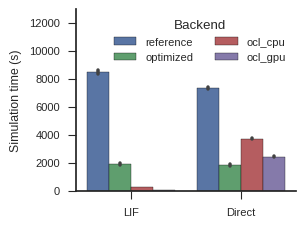

In [14]:
fig = plt.figure(figsize=(8. / 2.54, 6. / 2.54))
sns.barplot('neuron_type', 't_sim', hue='backend', data=df, hue_order=backend_order, order=neuron_type_order)
sns.despine()
plt.xlabel("")
plt.ylabel("Simulation time (s)")
plt.ylim(0, 1.3e4)
plt.legend(loc='best', ncol=2, title="Backend")
plt.tight_layout()
plt.savefig('../figures/spaun_sim.pdf')

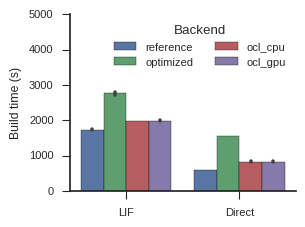

In [15]:
fig = plt.figure(figsize=(8. / 2.54, 6. / 2.54))
sns.barplot('neuron_type', 't_build', hue='backend', data=df, hue_order=backend_order, order=neuron_type_order)
sns.despine()
plt.xlabel("")
plt.ylabel("Build time (s)")
plt.ylim(0, 5e3)
plt.legend(loc='best', ncol=2, title="Backend")
plt.tight_layout()
plt.savefig('../figures/spaun_build.pdf')

In [16]:
df.query('model == "spaun"').groupby(['neuron_type', 'backend']).mean()

t_build  t_prefill        t_sim  trial
neuron_type backend                                              
Direct      ocl_cpu     829.214715  37.618113  3744.071985      2
            ocl_gpu     828.251515  24.694396  2449.001885      2
            optimized  1553.672997  18.348090  1849.843434      2
            reference   584.733618  72.849882  7360.171689      2
LIF         ocl_cpu    1974.990366   2.643462   265.620739      2
            ocl_gpu    1982.365203   0.646306    63.469701      2
            optimized  2765.038043  18.942707  1932.627852      2
            reference  1734.115061  84.801438  8488.759949      2